In [1]:
import re
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from collections import Counter
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('Preprocessed Data.csv')

In [3]:
df.shape

(20754, 13)

In [4]:
df.head(10)

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...
5,Adria Airways,1.0,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,had very bad experience with rerouted and canc...
6,Adria Airways,1.0,"Ljubljana to Zürich. Firstly, Ljubljana airp...",Economy Class,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no,ljubljana to zrich firstly ljubljana airport i...
7,Adria Airways,1.0,"First of all, I am not complaining about a s...",Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,first of all i am not complaining about a spec...
8,Adria Airways,1.0,Worst Airline ever! They combined two flight...,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no,worst airline ever they combined two flight to...
9,Adria Airways,8.0,Ljubljana to Munich. The homebase airport of ...,Economy Class,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes,ljubljana to munich the homebase airport of ad...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20754 entries, 0 to 20753
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            20754 non-null  object 
 1   Overall_Rating          20079 non-null  float64
 2   Review                  20754 non-null  object 
 3   Seat Type               19880 non-null  object 
 4   Seat Comfort            17058 non-null  float64
 5   Cabin Staff Service     16965 non-null  float64
 6   Food & Beverages        13116 non-null  float64
 7   Ground Service          16460 non-null  float64
 8   Inflight Entertainment  9764 non-null   float64
 9   Wifi & Connectivity     5248 non-null   float64
 10  Value For Money         19905 non-null  float64
 11  Recommended             20754 non-null  object 
 12  preprocessed_review     20754 non-null  object 
dtypes: float64(8), object(5)
memory usage: 2.1+ MB


**TextBlob**

In [6]:
from textblob import TextBlob
def textBlob_polarity_function(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [7]:
df['sentiment_score'] = df['preprocessed_review'].apply(textBlob_polarity_function)

In [8]:
pd.set_option('display.max_colwidth', None)
df[['preprocessed_review', 'sentiment_score']].head()

,preprocessed_review,sentiment_score
0,moroni to moheli turned out to be a pretty decent airline online booking worked well checkin and boarding wa fine and the plane looked well maintained it a very short flight just minute or so so i didnt expect much but they still managed to hand our a bottle of water and some biscuit which i though wa very nice both flight on time,0.302222
1,moroni to anjouan it is a very small airline my ticket advised me to turn up at hr which i did there wa confusion at this small airport i wa then directed to the office of ab aviation which wa still closed it opened at hr and i wa told that the flight had been put back to hr and that they had tried to contact me this could not be true a they did not have my phone number i wa with a local guide and he had not been informed either i presume that i wa bumped off the later flight did operate but a usual there wa confusion at checkin the flight wa only min and there were no further problem not a good airline but it is the only one for comoros,-0.077083
2,anjouan to dzaoudzi a very small airline and the only airline based in comoros checkin wa disorganised because of local with big package and disinterested staff the flight wa fortunately short min took off on time and landed on time with a short flight like there wa of course no inflight entertainment nor cabin service except for biscuit and a bottle of water which wa quite nice,0.039286
3,please do a favor yourself and do not fly with adria on the route from munich to pristina in july they lost my luggage and for day in a row despite numerous phone call they were not able to locate it day later the luggage arrived at the destination completely ruined applying for compensation they ignored my request foolishly again i booked another flight with them euro frankfurt pristina in september they cancelled the flight with no reason hour before the departure desperate phone call to customer service to get anything rerouting compensation etc were not responded i will never fly again with adria what a disgrace shame on you adria for constantly deceiving your customer,-0.193750
4,do not book a flight with this airline my friend and i should have returned from sofia to amsterdam on september and day before they sent u an sm informing the flight wa cancelled for straight day we tried to reach the airline and the web agent edreams and we did not get a solution finally hour before our cancelled flight time and after minute on a call waiting the airline wa able to get u on a flight with lufthansa do not book adria airway it is unreliable and in our case it ruined our last day of holiday since we needed to be on the phone all day,0.175000


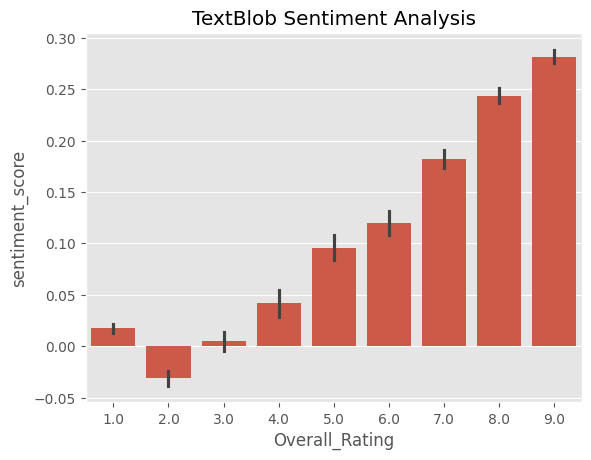

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

ax = sns.barplot(data=df, x='Overall_Rating', y='sentiment_score')
ax.set_title('TextBlob Sentiment Analysis')
plt.show()

**Data Analysis**

In [10]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"Before: Number of unique values in Airline Name: {unique_values_count}")

Before: Number of unique values in Airline Name: 447


In [11]:
# Count the occurrences of each Airline Name
airline_counts = df.groupby("Airline Name")["Airline Name"].transform("count")

# Filter the DataFrame to keep rows where the count is 50 or more
df = df[airline_counts >= 50]

In [12]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"After: Number of unique values in Airline Name: {unique_values_count}")

After: Number of unique values in Airline Name: 187


In [13]:
df.shape

(17252, 14)

In [14]:
# Group by "Airline Name" and compute the mean for "sentiment_score"
result = (
    df.groupby("Airline Name")["sentiment_score"]
    .mean()
    .reset_index()
    .sort_values(by="sentiment_score", ascending=False)
)
print(result)

                Airline Name  sentiment_score
94           Hainan Airlines         0.280020
146             Rex Airlines         0.263552
62   China Southern Airlines         0.239709
8                 Air Astana         0.237069
120             Lao Airlines         0.233575
..                       ...              ...
181       Tigerair Australia        -0.072293
92                     GoAir        -0.083934
127              Malindo Air        -0.090412
91                  Go First        -0.096103
44                   Avianca        -0.111851

[187 rows x 2 columns]


In [15]:
# Extract top 5 airlines with the highest sentiment_score
top_5_airlines = result.nlargest(5, "sentiment_score")
print(top_5_airlines)

                Airline Name  sentiment_score
94           Hainan Airlines         0.280020
146             Rex Airlines         0.263552
62   China Southern Airlines         0.239709
8                 Air Astana         0.237069
120             Lao Airlines         0.233575


In [16]:
# Extract top 5 airlines with the lowest sentiment_score
last_5_airlines = result.nsmallest(5, "sentiment_score")
print(last_5_airlines)

           Airline Name  sentiment_score
44              Avianca        -0.111851
91             Go First        -0.096103
127         Malindo Air        -0.090412
92                GoAir        -0.083934
181  Tigerair Australia        -0.072293


In [17]:
# Calculate the correlation matrix
columns_of_interest = ["sentiment_score", "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"]
correlation_matrix = df[columns_of_interest].corr()

# Extract the correlation of each column with sentiment_score
correlation_with_sentiment = correlation_matrix["sentiment_score"].sort_values(ascending=False)
print(correlation_with_sentiment)

sentiment_score           1.000000
Value For Money           0.595805
Ground Service            0.584119
Food & Beverages          0.581687
Seat Comfort              0.558135
Cabin Staff Service       0.554429
Wifi & Connectivity       0.485318
Inflight Entertainment    0.451040
Name: sentiment_score, dtype: float64


**Common Theme**

In [18]:
negative_reviews = df[df["sentiment_score"] < 0]["Review"]
positive_reviews = df[df["sentiment_score"] > 0]["Review"]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(reviews, num_top_words=500):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english", ngram_range=(2, 2))

    # Vectorize the reviews
    dtm = vectorizer.fit_transform(reviews)

    # Get the word frequencies
    word_frequencies = dtm.sum(axis=0).A1  # Sum across all rows (documents)

    # Map words to their frequencies
    words = vectorizer.get_feature_names_out()
    word_freq_dict = dict(zip(words, word_frequencies))

    # Sort the dictionary by frequency in descending order
    top_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:num_top_words]

    return top_words

In [20]:
# Get top words for positive and negative reviews
top_positive_words = get_top_words(positive_reviews, num_top_words=500)
top_negative_words = get_top_words(negative_reviews, num_top_words=500)

# Print top 20 words
print("Top words in positive reviews:")
for word, freq in top_positive_words[:20]:
    print(f"{word}: {freq}")

print("\nTop words in negative reviews:")
for word, freq in top_negative_words[:20]:
    print(f"{word}: {freq}")

Top words in positive reviews:
cabin crew: 1493
customer service: 1393
business class: 1337
flight attendants: 751
return flight: 644
flight delayed: 631
ground staff: 502
flight time: 498
leg room: 496
hour flight: 491
hong kong: 469
flight attendant: 429
connecting flight: 405
low cost: 379
flight cancelled: 378
economy class: 358
boarding pass: 349
crew friendly: 321
premium economy: 305
inflight entertainment: 293

Top words in negative reviews:
customer service: 1783
flight delayed: 697
worst airline: 567
business class: 551
connecting flight: 407
return flight: 381
flight cancelled: 379
cabin crew: 368
worst experience: 330
delayed hours: 327
hour flight: 255
boarding pass: 252
ground staff: 245
booked flight: 236
flight attendants: 224
hours flight: 206
fly airline: 193
30 minutes: 190
cancelled flight: 187
flight attendant: 163


In [21]:
from wordcloud import WordCloud

def generate_wordcloud(reviews, title="Word Cloud", num_top_words=500):
    # Get the top words
    top_words = get_top_words(reviews, num_top_words)

    # Create a dictionary for WordCloud
    word_freq_dict = dict(top_words)

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

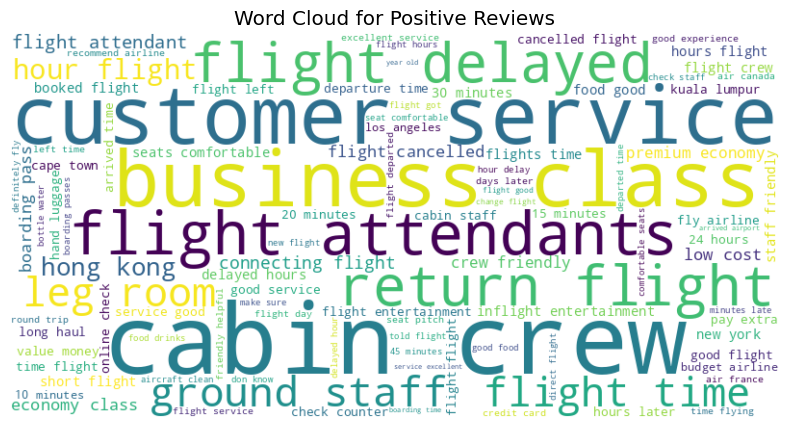

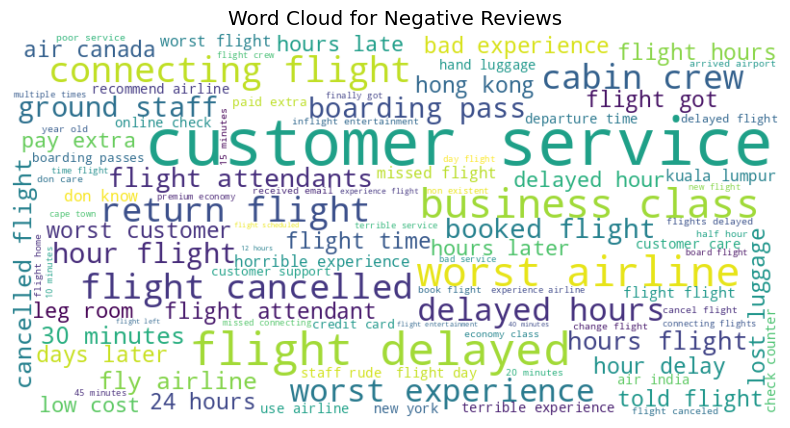

In [22]:
# Generate WordCloud for positive and negative reviews
generate_wordcloud(positive_reviews, title="Word Cloud for Positive Reviews", num_top_words=100)
generate_wordcloud(negative_reviews, title="Word Cloud for Negative Reviews", num_top_words=100)